            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


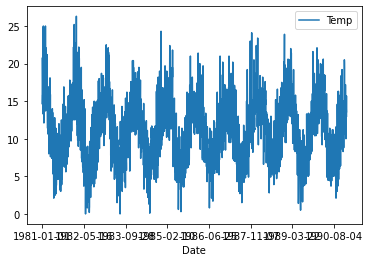

In [17]:
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

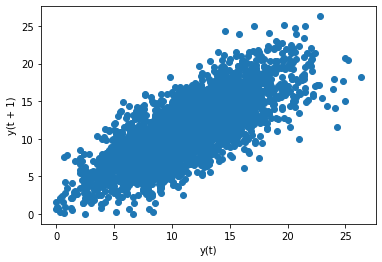

In [2]:
from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

C:\Users\Narde\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


predicted=15.384928, expected=15.300000
predicted=14.185985, expected=14.300000
predicted=14.016627, expected=13.500000
predicted=13.687271, expected=15.000000
predicted=14.645276, expected=13.600000
predicted=13.386686, expected=15.200000
predicted=14.492904, expected=17.000000
predicted=15.238277, expected=18.700000
predicted=16.294256, expected=16.500000
predicted=15.201811, expected=17.400000
predicted=16.086925, expected=18.300000
predicted=16.559916, expected=18.300000
predicted=16.405407, expected=22.400000
predicted=18.973241, expected=21.400000
predicted=18.168371, expected=20.900000
predicted=18.340187, expected=17.600000
predicted=16.605597, expected=15.500000
predicted=15.835589, expected=16.600000
predicted=16.429421, expected=16.200000
predicted=16.209534, expected=15.600000
predicted=15.793876, expected=14.500000
predicted=15.412826, expected=14.000000
predicted=14.842651, expected=15.600000
predicted=15.776541, expected=12.300000
predicted=13.609977, expected=11.600000


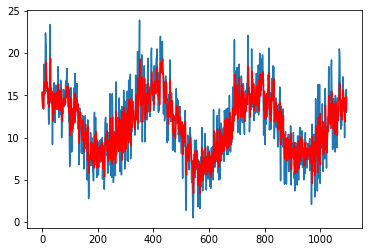

In [28]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
size = int(len(X)*.7)
train, test = X[1:size], X[size:len(X)]

# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()